In [1]:
import requests
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import requests
import numpy as np
import seaborn as sns
import json
import sys
import os


In [2]:
sns.set_theme()

### Time series Plot

Descriptive Statistics:
        microsensor_pm25  reference_pm25
count      14153.000000    14153.000000
mean          20.531134       10.546146
std          112.446975        8.774260
min           -1.248142        0.200000
25%            5.971785        4.700000
50%           11.092170        8.100000
75%           18.843056       13.100000
max         2468.988547       93.400000


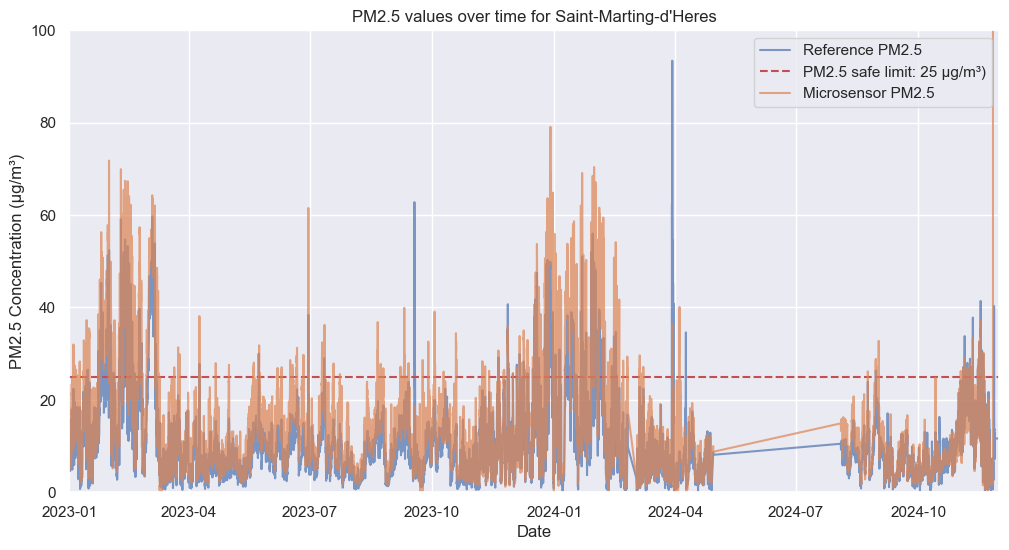

In [3]:

# Load the dataset
file_path = 'smh_23-24_training_set.csv' 
dataset = pd.read_csv(file_path)

# Convert the date column to datetime
dataset['date'] = pd.to_datetime(dataset['date'])
dataset = dataset.dropna()

# # Generate descriptive statistics
descriptive_stats = dataset[['microsensor_pm25', 'reference_pm25']].describe()
print("Descriptive Statistics:\n", descriptive_stats)

# Time Series Visualization
plt.figure(figsize=(12, 6))
plt.plot(dataset['date'], dataset['reference_pm25'], label='Reference PM2.5', alpha = 0.7)
plt.axhline(y=25, color='r', linestyle='--', label='PM2.5 safe limit: 25 µg/m³)')
plt.plot(dataset['date'], dataset['microsensor_pm25'], label='Microsensor PM2.5',alpha = 0.7)
plt.title('PM2.5 values over time for Saint-Marting-d\'Heres')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.xlim([pd.to_datetime('2023-01'), pd.to_datetime('2024-12')])
plt.ylim([0,100])
plt.legend()
plt.show()


In [4]:
threshold = 25

# Count the number of values exceeding the threshold for each column
exceed_reference = dataset[dataset['reference_pm25'] > threshold]
exceed_microsensor = dataset[dataset['microsensor_pm25'] > threshold]

# Get the count of exceeding values
count_exceed_reference = exceed_reference.shape[0]
count_exceed_microsensor = exceed_microsensor.shape[0]

# Get the total number of values
total_reference = dataset['reference_pm25'].shape[0]
total_microsensor = dataset['microsensor_pm25'].shape[0]

# Calculate the percentage of exceeding values
percent_exceed_reference = (count_exceed_reference / total_reference) * 100
percent_exceed_microsensor = (count_exceed_microsensor / total_microsensor) * 100

print(f"Percentage of values exceeding the threshold (25 µg/m³) in 'reference_pm25': {percent_exceed_reference:.2f}%")
print(f"Percentage of values exceeding the threshold (25 µg/m³) in 'microsensor_pm25': {percent_exceed_microsensor:.2f}%")


Percentage of values exceeding the threshold (25 µg/m³) in 'reference_pm25': 7.57%
Percentage of values exceeding the threshold (25 µg/m³) in 'microsensor_pm25': 15.47%


In [5]:
total_reference

14153

In [6]:
total_microsensor

14153

## Effects of Humidity and Temperature

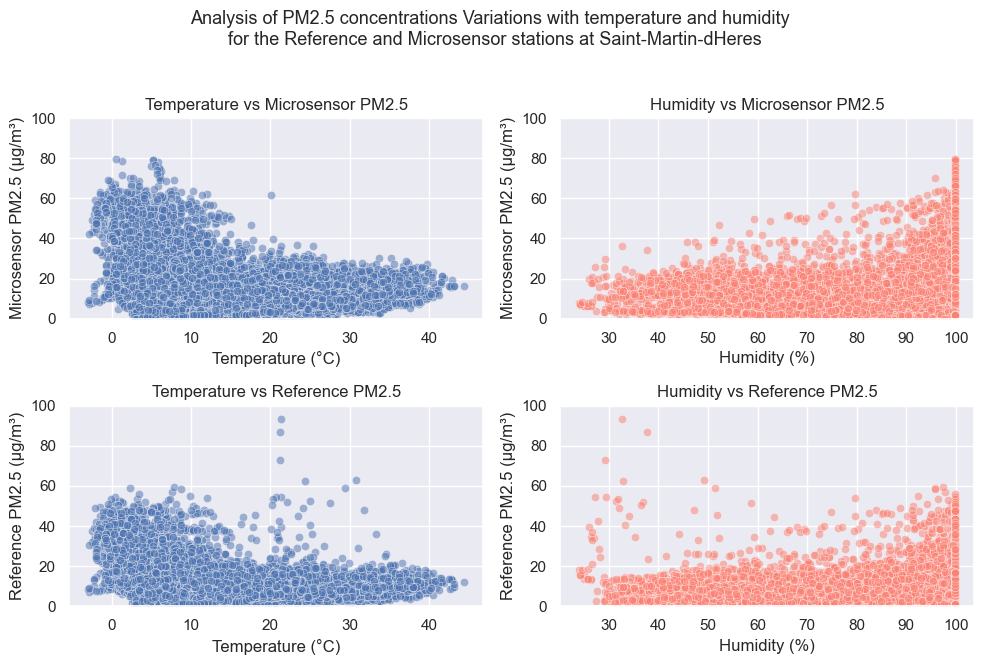

In [7]:
# Drop rows with missing values (if any)
dataset = dataset.dropna(subset=['microsensor_pm25', 'reference_pm25', 'temperature', 'humidity'])

# Separate datasets
microsensor_data = dataset[['microsensor_pm25', 'temperature', 'humidity']]
reference_data = dataset[['reference_pm25', 'temperature', 'humidity']]

# Function to perform analysis
def analyze_pm25(microsensor_data, reference_data):
    # Scatter plots
    plt.figure(figsize=(10, 6.5))
    # plt.suptitle('Analysis of PM2.5 Concentration Variations with Temperature and Humidity\nMicrosensor vs. Reference Measurements', fontsize=16, y=1.02)
    plt.suptitle("Analysis of PM2.5 concentrations Variations with temperature and humidity \n for the Reference and Microsensor stations at Saint-Martin-dHeres", fontsize=13, y=1.02)
    # Microsensor PM2.5 vs Temperature
    plt.subplot(2, 2, 1)
    sns.scatterplot(x='temperature', y='microsensor_pm25', data=microsensor_data, alpha=0.5)
    plt.title('Temperature vs Microsensor PM2.5')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Microsensor PM2.5 (µg/m³)')
    plt.ylim(0, 100)

    # Microsensor PM2.5 vs Humidity
    plt.subplot(2, 2, 2)
    sns.scatterplot(x='humidity', y='microsensor_pm25', data=microsensor_data, alpha=0.5, color='salmon')
    plt.title('Humidity vs Microsensor PM2.5')
    plt.xlabel('Humidity (%)')
    plt.ylabel('Microsensor PM2.5 (µg/m³)')
    plt.ylim(0, 100)

    # Reference PM2.5 vs Temperature
    plt.subplot(2, 2, 3)
    sns.scatterplot(x='temperature', y='reference_pm25', data=reference_data, alpha=0.5)
    plt.title('Temperature vs Reference PM2.5')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Reference PM2.5 (µg/m³)')
    plt.ylim(0, 100)

    # Reference PM2.5 vs Humidity
    plt.subplot(2, 2, 4)
    sns.scatterplot(x='humidity', y='reference_pm25', data=reference_data, alpha=0.5, color='salmon')
    plt.title('Humidity vs Reference PM2.5')
    plt.xlabel('Humidity (%)')
    plt.ylabel('Reference PM2.5 (µg/m³)')
    plt.ylim(0, 100)

    plt.tight_layout()
    plt.show()

analyze_pm25(microsensor_data, reference_data)


In [8]:
dataset.columns

Index(['date', 'microsensor_pm25', 'hourofday', 'monthofyear', 'season',
       'reference_pm25', 'temperature', 'humidity'],
      dtype='object')

### Seasonal Plots

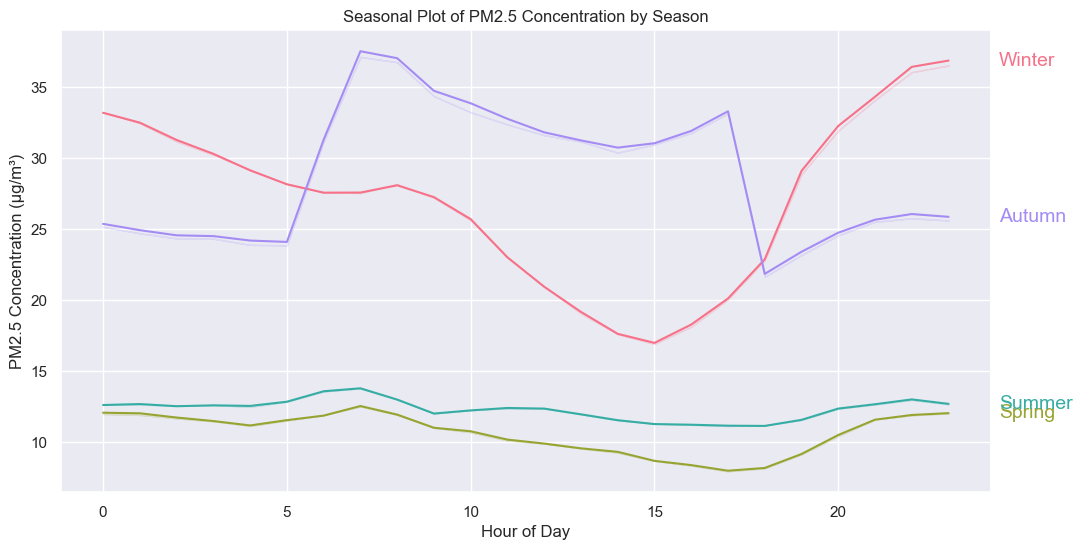

In [9]:

sys.path.append(os.path.abspath('../src'))
from seasonality import SeasonalPlotter

_, ax = plt.subplots(figsize=(12, 6))
SeasonalPlotter.seasonal_plot(
    X=dataset,
    y="microsensor_pm25",  
    period="season",      
    freq="hourofday",     
    ax=ax,
)
plt.xlabel('Hour of Day')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.title('Seasonal Plot of PM2.5 Concentration by Season')
plt.show()


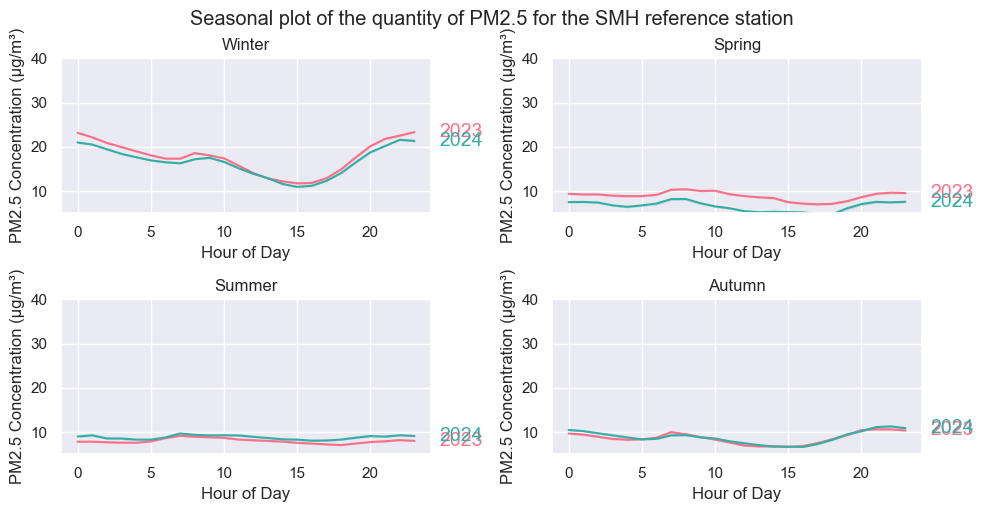

In [10]:
dataset['year'] = dataset['date'].dt.year

seasons = dataset['season'].unique()

fig, axes = plt.subplots(2, 2, figsize=(10, 5))  
axes = axes.flatten()

for idx, season in enumerate(seasons):
    season_data = dataset[dataset['season'] == season]

    SeasonalPlotter.seasonal_plot(
        X=season_data,
        y="reference_pm25",  
        period="year",         
        freq="hourofday",      # Frequency: hours of the day
        ax=axes[idx],
    )
    axes[idx].set_xlabel('Hour of Day')
    axes[idx].set_ylabel('PM2.5 Concentration (µg/m³)')
    axes[idx].set_title(f'{season}')
    axes[idx].grid(True)
    axes[idx].set_ylim(5, 40)

plt.tight_layout()
plt.suptitle("Seasonal plot of the quantity of PM2.5 for the SMH reference station", y = 1.02)
plt.show()


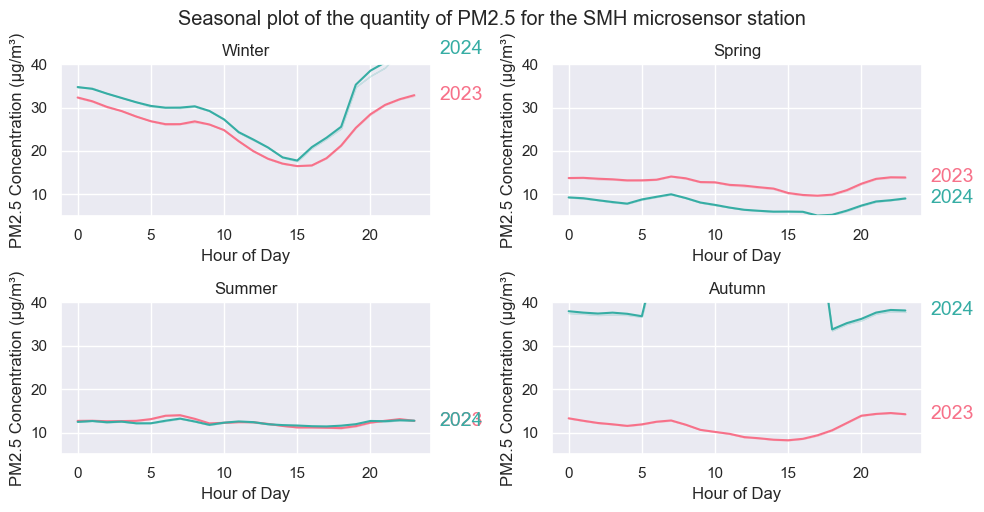

In [11]:

fig, axes = plt.subplots(2, 2, figsize=(10, 5))  

axes = axes.flatten()

for idx, season in enumerate(seasons):
    season_data = dataset[dataset['season'] == season]

    SeasonalPlotter.seasonal_plot(
        X=season_data,
        y="microsensor_pm25",  # The PM2.5 column from micro-sensors
        period="year",         # Use year to separate the data for each year
        freq="hourofday",      
        ax=axes[idx],
    )
    axes[idx].set_xlabel('Hour of Day')
    axes[idx].set_ylabel('PM2.5 Concentration (µg/m³)')
    axes[idx].set_title(f'{season}')
    axes[idx].grid(True)
    axes[idx].set_ylim(5, 40)

plt.tight_layout()
plt.suptitle("Seasonal plot of the quantity of PM2.5 for the SMH microsensor station",y=1.02)
plt.show()
